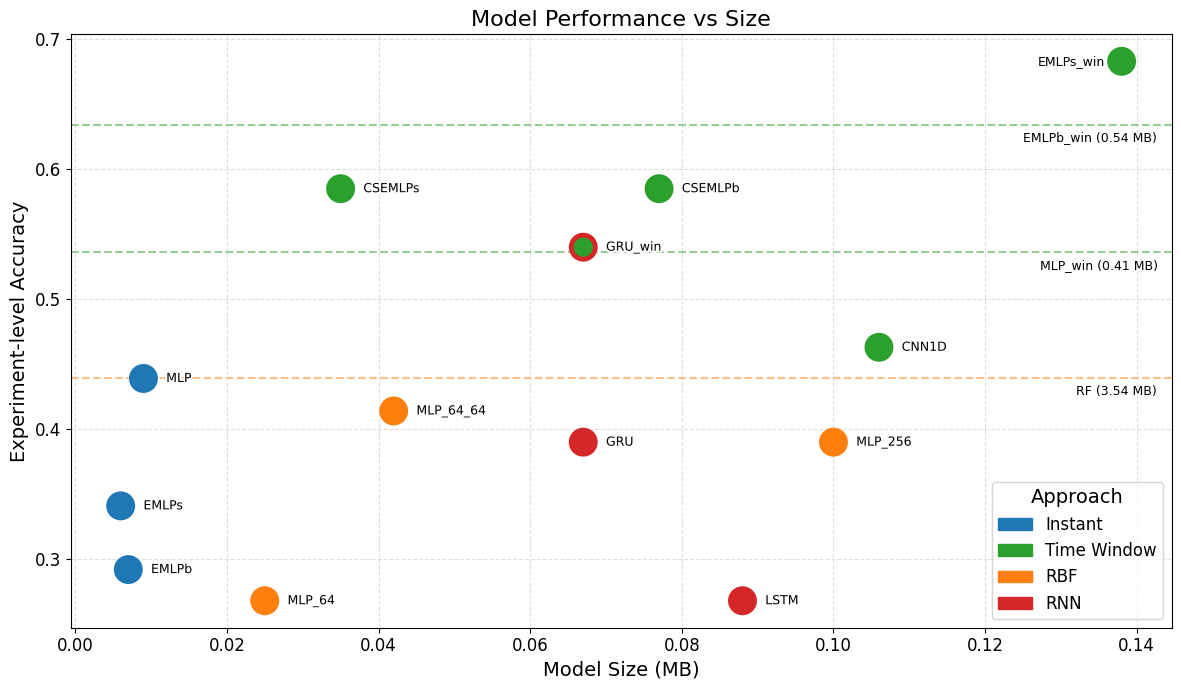

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.patheffects as pe

# Dati aggiornati
model_names = [
    "MLP", "EMLPs", "EMLPb",
    "EMLPs_win", "CSEMLPs", "CSEMLPb", "CNN1D",
    "MLP_64", "MLP_256", "MLP_64_64",
    "GRU", "LSTM",
    "GRU_win"
]
model_sizes = [
    0.009, 0.006, 0.007,
    0.138, 0.035, 0.077, 0.106,
    0.025, 0.100, 0.042,
    0.067, 0.088,
    0.067
]
experiment_accuracies = [
    0.439, 0.341, 0.292,
    0.683, 0.585, 0.585, 0.463,
    0.268, 0.390, 0.414,
    0.390, 0.268,
    0.540
]
approaches = [
    "Instant", "Instant", "Instant",
    "Time Window", "Time Window", "Time Window", "Time Window",
    "RBF", "RBF", "RBF",
    "RNN", "RNN",
    "RNN/Time Window"
]

# Colori
approach_colors = {
    "Instant": "tab:blue",
    "Time Window": "tab:green",
    "RBF": "tab:orange",
    "RNN": "tab:red",
}
colors = []
edgecolors = []

for app in approaches:
    if app == "RNN/Time Window":
        colors.append(approach_colors["Time Window"])
        edgecolors.append(approach_colors["RNN"])
    else:
        colors.append(approach_colors[app])
        edgecolors.append(approach_colors[app])

# Inizializza grafico
plt.figure(figsize=(12, 7))
scatter = plt.scatter(model_sizes, experiment_accuracies, s=300, c=colors, edgecolors=edgecolors, linewidths=3.5, zorder = 3)

# Linee orizzontali per EMLPb_win, MLP_win, CNN e RF

plt.axhline(y=0.634, color=approach_colors["Time Window"], linestyle='--', alpha=0.5, zorder = 1)
plt.text(0.125, 0.624, "EMLPb_win (0.54 MB)", color='black', va='center', fontsize=9, zorder = 2)

plt.axhline(y=0.536, color=approach_colors["Time Window"], linestyle='--', alpha=0.5, zorder = 1)
plt.text(0.1273, 0.526, "MLP_win (0.41 MB)", color='black', va='center', fontsize=9, zorder = 2)

plt.axhline(y=0.439, color=approach_colors["RBF"], linestyle='--', alpha=0.5, zorder = 1)
plt.text(0.132, 0.429, "RF (3.54 MB)", color='black', va='center', fontsize=9, zorder = 2)


# Annotazioni
for name, x, y in zip(model_names, model_sizes, experiment_accuracies):
    if name == "EMLPs_win":
        plt.text(x - 0.011, y, name, fontsize=9, color='black', ha='left', va='center')
    else:
        plt.text(x + 0.003, y, name, fontsize=9, color='black', ha='left', va='center', path_effects = [pe.withStroke(linewidth=3, foreground="white")], zorder=2)

# Etichette e stile
plt.xlabel("Model Size (MB)", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Experiment-level Accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.title("Model Performance vs Size", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.4)

# Legenda senza "RNN/Time Window"
legend_elements = [mpatches.Patch(color=c, label=a) for a, c in approach_colors.items()]
plt.legend(handles=legend_elements, title="Approach", loc='lower right', fontsize=12, title_fontsize=14)

# Salva
plt.tight_layout()
plt.savefig("model_performance_vs_size_lines.png", dpi=300)
plt.show()
